<a href="https://colab.research.google.com/github/kodi73/Learning-Backpropagation-Solving-XOR-Problem/blob/main/Backpropagation_ToSolveXORProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy==1.26.4
!pip install matplotlib==3.5.2

  Using cached matplotlib-3.5.2.tar.gz (35.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.5.2-cp312-cp312-linux_x86_64.whl size=11131041 sha256=75cbd5d5137a1ea5919100ec1f22e980a1a05b0ed60d4e15e7c86d63a371ce42
  Stored in directory: /root/.cache/pip/wheels/97/5d/e1/f7559183db24dbb009d1693f5bfec8c2ceba4b8ffcc19aba47
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.5.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.5.2 which is incompatible.
bigframes 2.17.0 requires matplotlib>=3.7.1, but you have matplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

In [11]:
def initialize_network_parameters():
  inputSize = 2
  hiddenSize = 2
  outputSize = 1
  lr = 0.1
  epochs = 180000

  w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
  b1 = np.random.rand(hiddenSize, 1) * 2 - 1
  w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
  b2 = np.random.rand(outputSize, 1) * 2 - 1

  return w1, b1, w2, b2, lr, epochs

In [12]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()
error_list = []

for epoch in range(epochs):
  # Forward Propagation
    z1 = np.dot(w1, X) + b1
    a1 = 1.0 / (1.0 + np.exp(-z1))

    z2 = np.dot(w2, a1) + b2
    a2 = 1.0 / (1.0 + np.exp(-z2))

    # Error Calculation
    error = d - a2

    # Backpropagation
    da2 = error * (a2 * (1 - a2))
    dz2 = da2

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * (a1 * (1 - a1))

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)

    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)

    if (epoch+1) % (epochs // 10) == 0:
      print(f"Epoch {epoch+1}: Error = {np.mean(np.abs(error))}")
      error_list.append(np.mean(np.abs(error)))

Epoch 18000: Error = 0.03428128276116159
Epoch 36000: Error = 0.021051475422078397
Epoch 54000: Error = 0.016430270110795307
Epoch 72000: Error = 0.01390449321228801
Epoch 90000: Error = 0.012259968586006774
Epoch 108000: Error = 0.011081940611726179
Epoch 126000: Error = 0.010185464442725337
Epoch 144000: Error = 0.009474101102286787
Epoch 162000: Error = 0.008892033678768854
Epoch 180000: Error = 0.008404442720345616


Testing the network

In [13]:
z1 = np.dot(w1, X) + b1
a1 = 1.0 / (1.0 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1.0 / (1.0 + np.exp(-z2))

print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


Final output after training: [[0.0083994  0.99206583 0.9903166  0.00760071]]
Ground truth [0 1 1 0]
Error after training: [[-0.00839942  0.00793419  0.00968343 -0.00760073]]
Average error: 0.00840


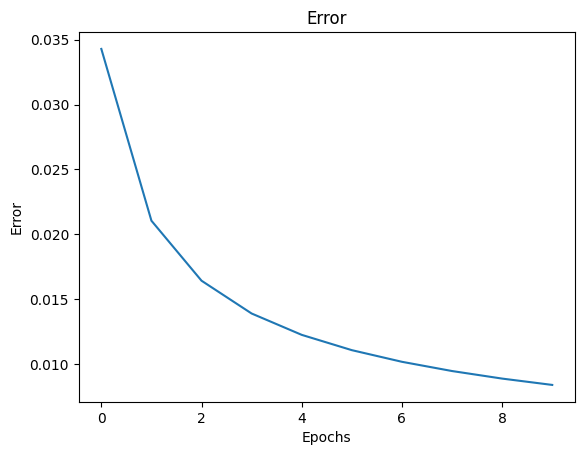

In [14]:
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()